# Blatt 4

## Aufgabe 1 (Nicht)lineare Anpassung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Betrachte die drei Datenpunkte (-1,0), (0,2), (1,1).

In [2]:
x = np.array([-1,0,1])
y = np.array([0,2,1])

def f(x,a,b):
    return a*x+b

### a) Schreibe ein Python-Programm, dass eine lineare Regression des Datensatzes durchfuhrt und plotte das Ergebnis.

slope:  0.5
intercept:  1.0


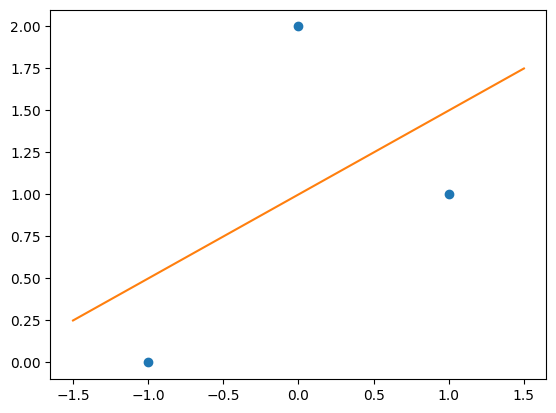

In [3]:
def linreg(x,y):
    slope = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    intercept = np.mean(y) - slope*np.mean(x)
    return slope, intercept

slope, intercept = linreg(x,y)
print("slope: ", slope)
print("intercept: ", intercept)

plt.plot(x,y,'o',label='data')

xl = np.linspace(-1.5,1.5,100)

plt.plot(xl,f(xl,slope,intercept),label='manual linear regression')

### b) Finde mithilfe der Polynomregression das interpolierende Polynom (2. Ordnung) und plotte es.

a: -1.5, b: -1.0, c: 2.0


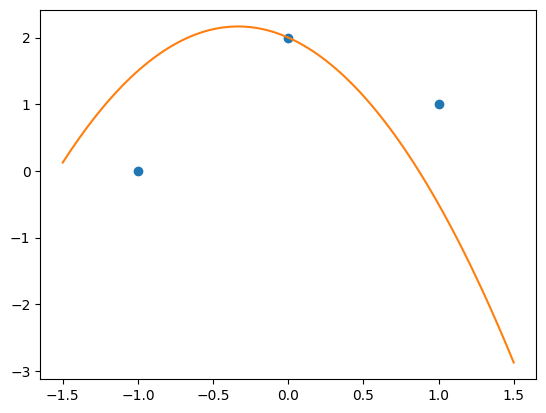

In [4]:
def f2(x,a,b,c):
    return a*x**2+b*x+c

def polyreg(x,y):
    a = (np.mean(x**2*y) - np.mean(x**2)*np.mean(y))/(np.mean(x**4) - np.mean(x**2)**2)
    b = (np.mean(x**3)*np.mean(y) - np.mean(x**2)*np.mean(x*y))/(np.mean(x**4) - np.mean(x**2)**2)
    c = np.mean(y) - a*np.mean(x**2) - b*np.mean(x)
    return a,b,c

a,b,c = polyreg(x,y)
print(f"a: {a}, b: {b}, c: {c}")

plt.plot(x,y,'o',label='data')
plt.plot(xl,f2(xl,a,b,c),label='manual second order polynomial regression')

### c) Verwende die Polynomapproximation mit den Legendre-Polynomen um das interpolierende Polynom linear zu n¨ahern. 
Vergleiche das Ergebnis mit dem aus a).

a: [1.         0.33333333 0.        ]


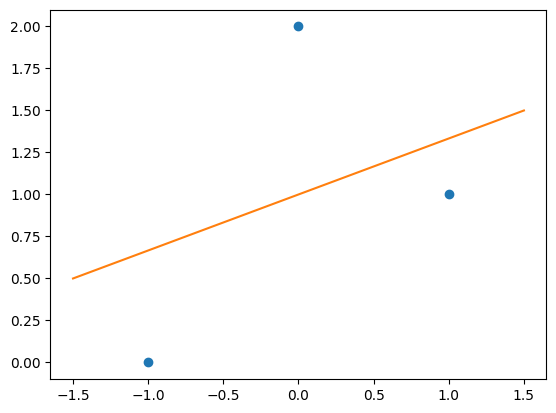

In [5]:
def legendre(x,n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n-1)/n)*x*legendre(x,n-1) - ((n-1)/n)*legendre(x,n-2)

def legendrereg(x,y,n):
    a = np.zeros(n+1)
    for i in range(n+1):
        a[i] = np.mean(y*legendre(x,i))
    return a

a = legendrereg(x,y,2)
print(f"a: {a}")

plt.plot(x,y,'o',label='data')
plt.plot(xl,f2(xl,a[2],a[1],a[0]),label='manual legendre regression')

### d) Mit Hilfe von gnuplot lassen sich Daten ”fitten”. 
Finde heraus wie das geht und teste es mit einer linearen Modellfunktion. Vergleiche das Ergebnis mit dem aus a).

import data from gnuplot

### e) Verwende Python (scipy.optimize.curve_fit) um die Daten mit einer linearen Funktion zu fitten.
Welche Fitparameter liefert Python? Vergleiche das Ergebnis mit
dem aus a).

[0.5 1. ] [0.8660254  0.70710678]


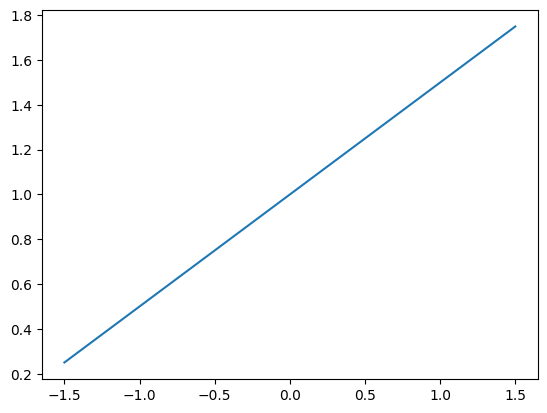

In [6]:
c, pcov = curve_fit(f, x, y)
print(c, np.sqrt(np.diag(pcov)))

plt.plot(xl,f(xl,c[0],c[1]),label='scipy linear regression')